## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
raw = pd.read_csv('daily_electricity_usage.csv')

In [3]:
raw['date'] = pd.to_datetime(raw['date'])

In [4]:
raw.head()

,Meter ID,date,total daily KW
0,1000,2009-07-14,11.203
1,1000,2009-07-15,8.403
2,1000,2009-07-16,7.225
3,1000,2009-07-17,11.338
4,1000,2009-07-18,11.306


## Data Cleaning

### Plotting data per customer

In [5]:
data = pd.DataFrame({'date':pd.date_range('2009-07-14',periods=536,freq='D',)})

for i in range(1000,7445):
    S = raw[raw['Meter ID']==i][['date','total daily KW']]
    data=pd.merge(data,S,how='left',on='date')
    
for i in range(1,6446):
    data.columns.values[i]="ID"+str(999+i)

In [6]:
data.head()

,date,ID1000,ID1001,ID1002,ID1003,ID1004,ID1005,ID1006,ID1007,ID1008,...,ID7435,ID7436,ID7437,ID7438,ID7439,ID7440,ID7441,ID7442,ID7443,ID7444
0,2009-07-14,11.203,6.744,6.355,24.183,50.057,17.765,12.056,30.399,27.217,...,15.643,36.500,15.346,0.732,138.130,41.813,14.491,36.813,5.112,52.940
1,2009-07-15,8.403,6.949,8.972,26.659,48.813,19.801,17.169,23.976,31.996,...,14.667,29.443,26.156,0.685,115.893,31.572,12.597,40.492,18.233,35.582
2,2009-07-16,7.225,7.255,8.794,32.017,32.555,15.216,16.260,34.534,24.363,...,18.037,28.786,23.945,0.707,127.698,32.618,15.816,41.487,6.925,29.307
3,2009-07-17,11.338,7.190,8.306,33.032,46.727,23.418,14.813,19.251,23.122,...,11.512,31.394,23.118,0.655,142.211,36.614,13.162,43.986,5.370,40.986
4,2009-07-18,11.306,6.805,10.119,31.238,35.215,29.392,12.325,21.392,25.721,...,30.767,22.112,15.582,0.682,4.641,27.982,13.301,41.018,6.751,40.270


### Handling missing values

In [7]:
data.isnull().sum().sum()

163262

In [8]:
data = data.fillna(data.mean())

### Segmentation

In [9]:
data.date = pd.to_datetime(data.date)
data['day'] = data['date'].apply(lambda x:x.weekday())
x_call = data.columns[1:-1]

In [10]:
data_fix = pd.DataFrame({'Meter ID':range(1000,7445,1),'total KW':np.sum(data[x_call]).values})
data_fix['average per day']=data[x_call].mean().values
data_fix['% Monday']=data[data['day']==0][x_call].sum().values/data_fix['total KW']*100
data_fix['% Tuesday']=data[data['day']==1][x_call].sum().values/data_fix['total KW']*100
data_fix['% Wednesday']=data[data['day']==2][x_call].sum().values/data_fix['total KW']*100
data_fix['% Thursday']=data[data['day']==3][x_call].sum().values/data_fix['total KW']*100
data_fix['% Friday']=data[data['day']==4][x_call].sum().values/data_fix['total KW']*100
data_fix['% Saturday']=data[data['day']==5][x_call].sum().values/data_fix['total KW']*100
data_fix['% Sunday']=data[data['day']==6][x_call].sum().values/data_fix['total KW']*100
data_fix['% weekday']=data[(data['day']!=5)&(data['day']!=6)][x_call].sum().values/data_fix['total KW']*100
data_fix['% weekend']=data[(data['day']==5)|(data['day']==6)][x_call].sum().values/data_fix['total KW']*100

In [11]:
data_fix=data_fix.fillna(0)
data_fix.head()

,Meter ID,total KW,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend
0,1000,5515.675,10.290438,13.818961,14.649395,14.792587,12.848944,13.900039,15.455497,14.534576,70.009926,29.990074
1,1001,5090.375,9.496968,14.126091,14.361830,14.289969,14.611595,14.851637,13.891904,13.866974,72.241122,27.758878
2,1002,5352.830,9.986623,15.714585,14.486150,16.015827,15.183408,13.964968,12.886305,11.748757,75.364938,24.635062
3,1003,16305.581,30.420860,14.545051,14.048454,14.216507,14.363180,14.000151,14.630714,14.195943,71.173342,28.826658
4,1004,25326.442,47.250825,14.630796,14.177041,14.400305,13.674076,12.893055,14.671563,15.553164,69.775273,30.224727


### Standardization Data

In [12]:
from sklearn.preprocessing import StandardScaler
x_calls = data_fix.columns[1:]
scaller = StandardScaler()
matrix = pd.DataFrame(scaller.fit_transform(data_fix[x_calls]),columns=x_calls)
matrix['Meter ID'] = data_fix['Meter ID']
print(matrix.head())

   total KW  average per day  % Monday  % Tuesday  % Wednesday  % Thursday  \
0 -0.462901        -0.462901 -0.248425   0.150228     0.333406   -0.956438   
1 -0.477627        -0.477627 -0.026894  -0.042109    -0.010012    0.279580   
2 -0.468539        -0.468539  1.118883   0.041043     1.169195    0.680550   
3 -0.089300        -0.089300  0.275301  -0.251709    -0.060206    0.105385   
4  0.223048         0.223048  0.337149  -0.165704     0.065376   -0.377833   

   % Friday  % Saturday  % Sunday  % weekday  % weekend  Meter ID  
0 -0.251452    0.500570  0.118593  -0.253682   0.324755      1000  
1  0.452542   -0.181690 -0.111800   0.170082  -0.161274      1001  
2 -0.203417   -0.620474 -0.842809   0.763378  -0.841745      1002  
3 -0.177389    0.140683  0.001729  -0.032718   0.071324      1003  
4 -0.996421    0.158507  0.470114  -0.298249   0.375870      1004  


### Correlation

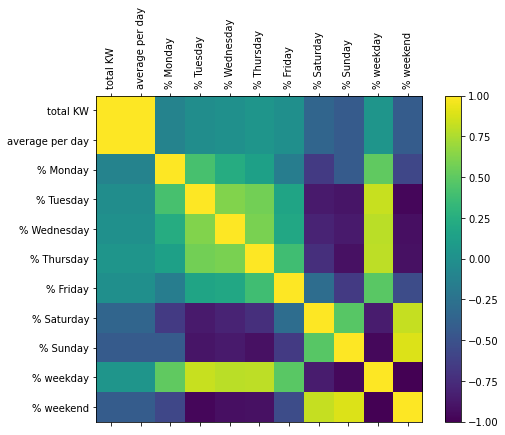

In [13]:
corr = matrix[x_calls].corr()
fig, ax = plt.subplots(figsize=(8, 6))
cax=ax.matshow(corr,vmin=-1,vmax=1)
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=90)
plt.colorbar(cax)

## Clustering (K-Means)
### Determining the number of cluster

In [14]:
def plot_BIC(matrix,x_calls,K):
    from sklearn import mixture
    BIC=[]
    for k in K:
        model=mixture.GaussianMixture(n_components=k,init_params='kmeans')
        model.fit(matrix[x_calls])
        BIC.append(model.bic(matrix[x_calls]))
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(K,BIC,'-cx')
    plt.ylabel("BIC score")
    plt.xlabel("k")
    plt.title("BIC scoring for K-means cell's behaviour")
    return(BIC)

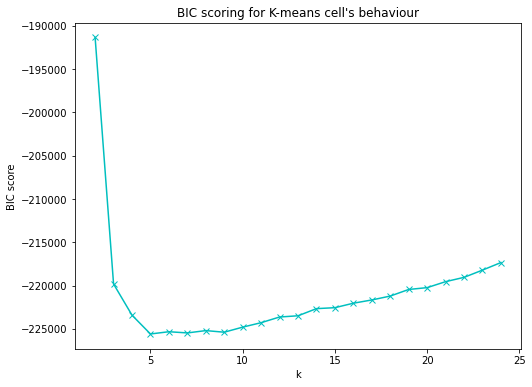

In [15]:
K = range(2,25)
BIC = plot_BIC(matrix,x_calls,K)

It is ideal to split the customers into 5 groups

### Clustering

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
cluster = KMeans(n_clusters=5,random_state=217)
matrix['cluster'] = cluster.fit_predict(matrix[x_calls])
print(matrix.cluster.value_counts())

0    3753
4    2202
2     385
1      95
3      10
Name: cluster, dtype: int64


Text(0.5, 1.0, 'Cluster of Data')

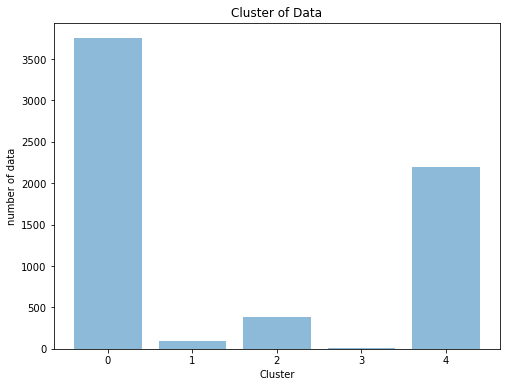

In [17]:
d=pd.DataFrame(matrix.cluster.value_counts())
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(d.index,d['cluster'],align='center',alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('number of data')
plt.title('Cluster of Data')

In [18]:
from sklearn.metrics.pairwise import euclidean_distances
distance = euclidean_distances(cluster.cluster_centers_, cluster.cluster_centers_)
print(distance)

[[ 0.          9.35094728  6.67614248 28.24907501  2.02803085]
 [ 9.35094728  0.          9.82435185 30.46869987  9.84850607]
 [ 6.67614248  9.82435185  0.         31.68601779  8.68103077]
 [28.24907501 30.46869987 31.68601779  0.         27.44568674]
 [ 2.02803085  9.84850607  8.68103077 27.44568674  0.        ]]


The first segment (Cluster 0) contains 95 costumers, the second (Cluster 1) 3747 costumers, the third (Cluster 2) 10 costumers, the fourth (Cluster 3) 2208 costumers, and the fifth (Cluster 4) 385 costumers.

### Visualization Segment

In [19]:
# Reduction dimention of the data using PCA
pca = PCA(n_components=3)
matrix['x'] = pca.fit_transform(matrix[x_calls])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_calls])[:,1]
matrix['z'] = pca.fit_transform(matrix[x_calls])[:,2]

# Getting the center of each cluster for plotting
cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=['x', 'y', 'z'])
cluster_centers['cluster'] = range(0, len(cluster_centers))
print(cluster_centers)

           x         y         z  cluster
0   0.263091 -0.242740 -0.020161        0
1   3.091673  8.622535 -0.845156        1
2   6.897584 -0.321715  0.021218        2
3 -14.255594  2.118913 -9.273445        3
4  -1.724832  0.088645  0.109345        4


Text(0.5, 1.0, 'Data Segmentation')

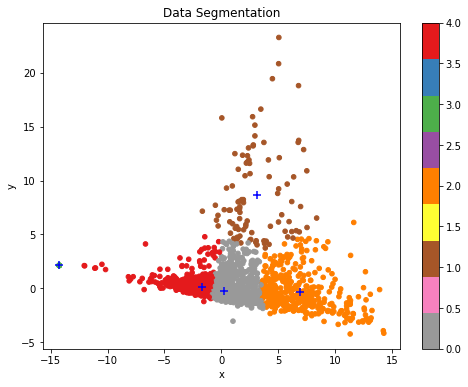

In [20]:
# Plotting for 2-dimention
fig, ax = plt.subplots(figsize=(8, 6))
scatter=ax.scatter(matrix['x'],matrix['y'],c=matrix['cluster'],s=21,cmap=plt.cm.Set1_r)
ax.scatter(cluster_centers['x'],cluster_centers['y'],s=70,c='blue',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
plt.title('Data Segmentation')

Text(0.5, 0.92, 'Data Segmentation')

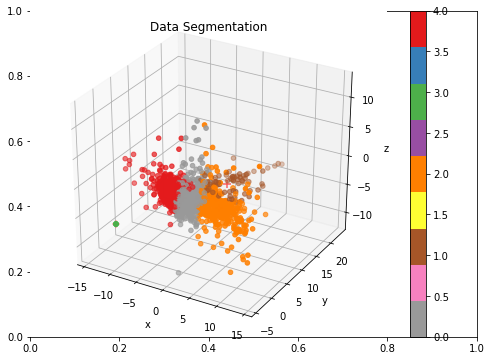

In [21]:
# Plotting for 3-Dimention
fig, ax = plt.subplots(figsize=(8, 6))
ax=fig.add_subplot(111, projection='3d')
scatter=ax.scatter(matrix['x'],matrix['y'],matrix['z'],c=matrix['cluster'],s=21,cmap=plt.cm.Set1_r)
ax.scatter(cluster_centers['x'],cluster_centers['y'],cluster_centers['z'],s=70,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.colorbar(scatter)
plt.title('Data Segmentation')

#### By the plots above, we can see that all segments are separated well from each other. It means that BIC method works good for this project.

### The behavior of each segment:

In [22]:
data_fix['cluster']=matrix['cluster']
print(data_fix[data_fix.columns[1:]].groupby(['cluster']).agg([np.mean]))

              total KW average per day   % Monday  % Tuesday % Wednesday  \
                  mean            mean       mean       mean        mean   
cluster                                                                    
0         15158.451170       28.280692  14.316041  14.589846   14.462756   
1        204513.395071      381.554842  14.399471  14.874050   14.868919   
2         38078.381322       71.041756  15.771192  17.997538   17.604645   
3             0.000000        0.000000   0.000000   0.000000    0.000000   
4         13956.784000       26.038776  13.676202  13.564929   13.498745   

        % Thursday   % Friday % Saturday   % Sunday  % weekday  % weekend  
              mean       mean       mean       mean       mean       mean  
cluster                                                                    
0        14.358826  14.282409  14.047492  13.942631  72.009877  27.990123  
1        15.069749  15.009099  13.557638  12.221076  74.221287  25.778713  
2        17

In [22]:
list(data_fix[data_fix.cluster==3]['Meter ID'])

[2083, 2691, 3141, 3348, 4096, 4113, 4447, 5855, 6596, 6713]

Cluster 0 contains only 95 IDs but the average of daily usage and total KW is so high, 381.55 kWh and 304513.39 kWh respectively. They also have activities in all days, the highest in Thursday and Friday. We can guess that Cluster 0 comes from big companies.

Cluster 1 is a biggest segment in this project contains 3747 IDs. The average of total electricity usage in observation period is 15161.06 kWh and the average of daily electricity usage is 28.28 kWh. From the percentage of daily usage in weekend or weekdays, we can see that there is no significant different between them. The consumption is about 14%. By this behaviour we can guess that the IDs in Cluster 0 comes from housing or small company that has same activities in all days.

Cluster 2 contains 10 IDs that is not observed in this project. It can be seen from the total of electricity usage that is 0 kWh. The IDs not observed in this project are 2083, 2691, 3141, 3348, 4096, 4113, 4447, 5855, 6596, dan 6713.

Cluster 4 has 2208 IDs and similar behavior with Cluster 1. It is confirmed by the distance between those centroids. Not only that, the similar behavior also can be seen from the daily electricity usage and the total consumption 26.4 kWh and 13955.61 kWh respectively. However, the percentage of daily using is little bit different eith Cluster 0, in weekdays the percentage is about 13% per day and it increases in weekend becomes about 16%. We can guess that those IDs are constumers comes from housing or small companies who have more activities in weekend rather than weekdays.

The IDs in Cluster 5 comes from middle companies who only have activities in weekdays. We can see from the behavior of daily electricity usage where there is significant different between weekdays and weekend. In weekdays, the percentage of electricity usage is about 17% and it become slighly decrease in Monday and Friday. However,it got dramatically decrease in weekend about only 7%.

## Time Series Analysis

In [23]:
data_cluster=data_fix[['Meter ID','cluster']]
data_forc=pd.DataFrame({'ds':pd.to_datetime(data['date'])})

In [24]:
for k in range(len(cluster_centers)):
    data_clus=data_cluster[data_cluster['cluster']==k]
    del data_clus['cluster']
    s1="cluster "+str(k)
    data_forc[s1]=0
    for i in list(data_clus.iloc[:,0]):
        s2="ID"+str(i)
        data_forc[s1]+=data[s2]
data_forc=data_forc.fillna(0)
data_forc_0=data_forc[['ds','cluster 0']]
data_forc_0.columns=['ds','y']

data_forc_1=data_forc[['ds','cluster 1']]
data_forc_1.columns=['ds','y']

data_forc_2=data_forc[['ds','cluster 2']]
data_forc_2.columns=['ds','y']

data_forc_3=data_forc[['ds','cluster 3']]
data_forc_3.columns=['ds','y']

data_forc_4=data_forc[['ds','cluster 4']]
data_forc_4.columns=['ds','y']

data_forc_all=pd.DataFrame({'ds':data_forc['ds']})
data_forc_all['y']=data_forc['cluster 0']+data_forc['cluster 1']+data_forc['cluster 2']+data_forc['cluster 3']+data_forc['cluster 4']

In [25]:
def plot_data(data_forc):
    timeseries=data_forc.copy()
    timeseries.columns=['date','Total Daily KW']
    timeseries = timeseries.set_index('date') 
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.scatter(timeseries.index,timeseries['Total Daily KW'],c='black',s=2)

In [29]:
data_forc_0.to_csv('Cluster0.csv')
data_forc_1.to_csv('Cluster1.csv')
data_forc_2.to_csv('Cluster2.csv')
data_forc_3.to_csv('Cluster3.csv')
data_forc_4.to_csv('Cluster4.csv')